In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import datetime as dt
import matplotlib as mpl
import geopandas
import seaborn as sns
import patchworklib as pw

## Plotting parameters
mpl.rcParams['pdf.fonttype'] = 42

## Cubic feet to cubic meters conversion factor
cfs_2_cms = 0.0283168466

<Figure size 100x100 with 0 Axes>

## Read in data and plot

In [49]:
out7Q  = pd.read_csv("../data/LowFlow7QTiming_stats.csv")
outLowFLow = pd.read_csv("../data/LowFlowTiming_stats.csv",)

In [50]:
df = pd.read_csv("../data/pnwNP_StatsLocations_HydroClass.csv")
df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.dec_long_va,df.dec_lat_va)).set_crs('epsg:4269')
df = df[["gage","HydroLandClass"]]
df_7Q = pd.merge(out7Q, df, on="gage")
df_LowFlow = pd.merge(outLowFLow, df, on="gage")

## Plot start date of 7-day low flow

In [130]:
## Adjust DOY to Climate Year for easier plotting
out7Q.loc[out7Q.value>=91,"CDOY"] = out7Q.value - 91
out7Q.loc[out7Q.value < 91,"CDOY"] = (out7Q.value + 365) - 91

key = {'streamflow_VIC_7Q_DOY': 'vic',
          'streamflow_PRMS_7Q_DOY': 'prms' ,
          'streamflow_NWM2d1_7Q_DOY': 'nwm1',
          'streamflow_NWM3_7Q_DOY': 'nwm3',
          'streamflow_NWIS_7Q_DOY': 'nwis'
      }

out7Q["model"] = out7Q["variable"].map(key)

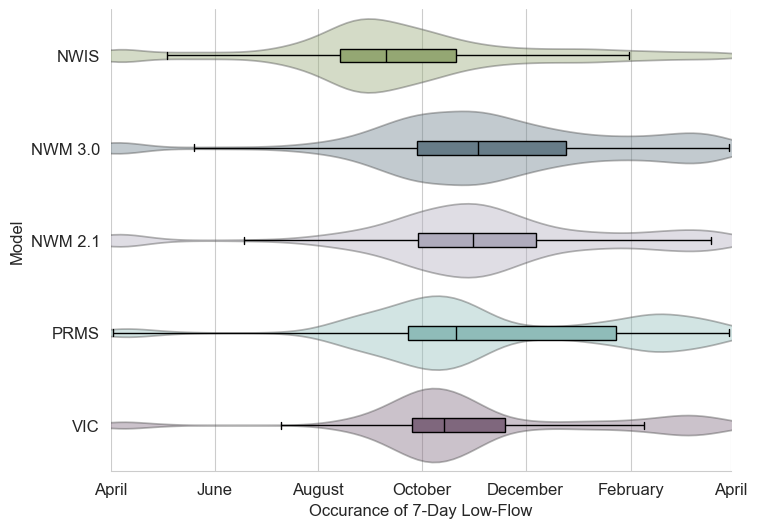

In [214]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")

pal = {'nwm3': '#627E8D',
       'nwm1': '#AEA8BF',
       'prms': '#87C4BF',
       'vic': '#836381',
      'nwis': "#96B06A"}

ax = sns.violinplot(data=out7Q, 
                    y="model",
                    x="CDOY",
                    hue="model",
                    order = ["nwis","nwm3","nwm1","prms","vic"],
                    palette=pal,
                    linewidth=1.25,
                    # fill=False,
                    alpha = 0.4,
                    inner=None)

sns.boxplot(ax=ax,
            data=out7Q, 
            y="model",
            x="CDOY",
            hue="model",
            order = ["nwis","nwm3","nwm1","prms","vic"],
            palette=pal,
            showfliers=False,
            width = 0.15,
            linecolor="black",
           linewidth=1)
           

ax.set_xlim([0,365])
ax.set_xticks([0,152-91,213-91,274-91,335-91,(32+365)-91,365])
ax.set_xticklabels(["April","June","August","October","December","February","April"])
ax.set_yticklabels(["NWIS","NWM 3.0","NWM 2.1","PRMS","VIC"])
ax.set(ylabel="Model")
ax.set(xlabel="Occurance of 7-Day Low-Flow")

sns.despine(left=True)

plt.savefig("../docs/lowFlow7Q_timing.pdf")
# plt.savefig("../docs/lowFlow7Q_timing.png",dpi=600)

## Plot start date of 7-day low flow

In [207]:
## Adjust DOY to Climate Year for easier plotting
df_LowFlow.loc[df_LowFlow.value>=91,"CDOY"] = df_LowFlow.value - 91
df_LowFlow.loc[df_LowFlow.value < 91,"CDOY"] = (df_LowFlow.value + 365) - 91

key = {'streamflow_VIC_LowFlow_Start_DOY': 'vic',
          'streamflow_PRMS_LowFlow_Start_DOY': 'prms' ,
          'streamflow_NWM2d1_LowFlow_Start_DOY': 'nwm1',
          'streamflow_NWM3_LowFlow_Start_DOY': 'nwm3',
          'streamflow_NWIS_LowFlow_Start_DOY': 'nwis'
      }

df_LowFlow["model"] = df_LowFlow["variable"].map(key)

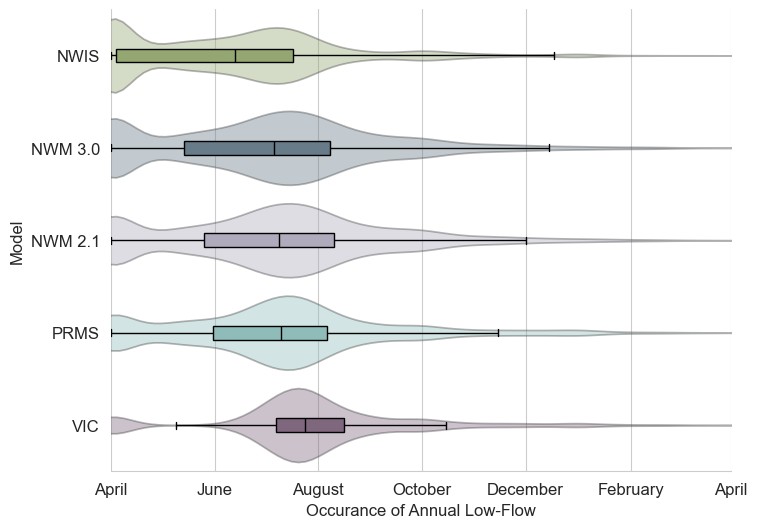

In [215]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")

pal = {'nwm3': '#627E8D',
       'nwm1': '#AEA8BF',
       'prms': '#87C4BF',
       'vic': '#836381',
      'nwis': "#96B06A"}

ax = sns.violinplot(data=df_LowFlow, 
                    y="model",
                    x="CDOY",
                    hue="model",
                    order = ["nwis","nwm3","nwm1","prms","vic"],
                    palette=pal,
                    linewidth=1.25,
                    # fill=False,
                    alpha = 0.4,
                    inner=None)

sns.boxplot(ax=ax,
            data=df_LowFlow, 
            y="model",
            x="CDOY",
            hue="model",
            order = ["nwis","nwm3","nwm1","prms","vic"],
            palette=pal,
            showfliers=False,
            width = 0.15,
            linecolor="black",
           linewidth=1)
           

ax.set_xlim([0,365])
ax.set_xticks([0,152-91,213-91,274-91,335-91,(32+365)-91,365])
ax.set_xticklabels(["April","June","August","October","December","February","April"])
ax.set_yticklabels(["NWIS","NWM 3.0","NWM 2.1","PRMS","VIC"])
ax.set(ylabel="Model")
ax.set(xlabel="Occurance of Annual Low-Flow")
sns.despine(left=True)

plt.savefig("../docs/lowFlow_timing.pdf")
# plt.savefig("../docs/lowFlow_timing.png",dpi=600)